<a href="https://colab.research.google.com/github/shinhs0920/Engineering-computing-application/blob/master/Seq2seq-fingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####rdkit 설치

seq2seq에 필요한 rdkit를 설치합니다.

In [0]:
import os

# For 현재 라이브러리를 실행합니다
import sys
sys.path.insert(0, "../")

expr_root = os.path.expanduser("~/expr/unsup-seq2seq/")
data_root = os.path.join(expr_root, "data")

if not os.path.exists(data_root):
    os.makedirs(data_root)

In [0]:
def DownloadRDkit():
  !wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
  !chmod +x Miniconda3-latest-Linux-x86_64.sh
  !time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
  !time conda install -q -y -c conda-forge rdkit

In [0]:
DownloadRDkit() # RDkit 다운로드
%matplotlib inline
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2019-12-17 11:49:14--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.2.0=py37_0
    - ca-certificates==2019.10.16=0
    - certifi==2019.9.11=py37_0
    - cffi==1.13.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_0
    - conda==4.7.12=py37_0
    - cryptography==2.8=py37h1ba5d50_0
    - idna==2.8=py37_0
    - libedit==3.1.20181209=h

In [0]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2019-12-17 11:50:00--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.2.0=py37_0
    - ca-certificates==2019.10.16=0
    - certifi==2019.9.11=py37_0
    - cffi==1.13.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_0
    - conda==4.7.12=py37_0
    - cryptography==2.8=py37h1ba5d50_0
    - idna==2.8=py37_0
    - libedit==3.1.20181209=h

# Keras에서 SMILES를 사용한 Seq2seq RNN 모델

# Seq2seq Fingerprint: An Unsupervised Deep Molecular Embedding for Drug Discovery - 참고

오늘날 많은 약물 발견은 많은 전문지식을 필요로 합니다. 

최근 10년 동안 R&D 부서를 가진 모든 제약회사는 약물 발견을 위해 복잡한 생물학적 테스트를 사용하여 잠재적 약물 후보를 선택하였습니다. 

하지만, 이 과정은 너무 비싸고 노동 집약적이며 비용이 매년 수억달러로써 많이 들기 때문에 최근에 머신러닝 학습방법을 사용하여 자동으로 화학적인 특성을 파악하여 구조적 특성과 약물 효과의 유사성을 통해 잠재적 약물 후보를 택하는 방법이 큰 관심을 불러일으켰습니다.

따라서 약물 발견을 위해, 화학 분자 특성을 파악해야하며 그 방식으로 seq2seq RNN 모델을 사용하며 Keras에서 SMILES(Simplified
Molecular-Input Line-Entry system )를 사용한 기계 학습 알고리즘으로 화학 분자 특성을 파악하고자 합니다.



대부분의 기계학습 알고리즘은 고정된 길이 벡터를 사용합니다. 하지만, 분자의 다양한 성질은 일정한 길이를 가진 벡터로 나타내는 것을 어렵게 합니다.



따라서 seq2seq 학습에서 fingerprint를 사용하여 새로운 고정된 길이벡터의 분자를 만드려 합니다. 

seq2seq 학습의 입력&출력을 동일하게하고 , 분자의 텍스트 표현인 SMILE문자열을 고정 크기의 벡터로 변환한 다음, 다시 원래의 SMILE문자열로 바꿉니다.

그러나 SMILES 생성의 기초가되는 화학적 규칙을 과도하게 맞추지 않고 이러한 문자 기반 알고리즘 하나를 학습하려면 수천 개의 분자가 필요합니다.

따라서 자동 인코더를 만들어서 이용합니다. 기본 아이디어는 입력 (여기서는 SMILES 문자열) 문자열을 latent space(z벡터가 차지하는 공간)에 코딩 한 다음에 공간에서 원래 입력을 다시 작성하는 것입니다. 훈련 후, 자동 인코더는 인코더 및 디코더로 분할 될 수 있습니다.

디코더는 관심있는 분자 주변의 영역을 샘플링하고 유사하지만 동일하지 않은 분자를 생성하는 데 사용될 수 있습니다.

또한 keras-molecules를 사용하여 후속 시각화로 분자를 잠재 공간에 매핑하는 경험에 대해 작성했습니다 . 이 코드는 RNN based incoder와 GRU based decoder를 사용합니다.

오토인코더는 입력값을 받아들여, 같은 크기로 출력합니다. 쉽게 말해서 데이터를 압축합니다. 또한 unsupervised learning으로 자동으로 중요한 Feature들을 찾아
줌으로써 Feature의 수를 줄여 데이터의 차원이 감소합니다.

화학분자구조에서는 분자 구조, 결합, 분자구성원소 등 중요한 Feature를 자동으로 찾아줍니다. 
오토인코더는 머신러닝에서 분포된 데이터들의 주성분 분석이라 불리는 PCA(Principal Component Analysis) 과 비슷한 역할을 합니다.

이제 오토인코더가 자주 쓰이는 이유에 대해 알려드리도록 하겠습니다.

smiles를 기반으로 분자 autoencoders을 개선하는 방법에 대해 알아 봅니다.

LSTM-RNN 을 사용하고 이 네트워크에 구성된 분자의 SMILES 문자열이 어떻게 형식화되는지에 여러 규칙과 이에 대한 문자를 반복하여 동일한 규칙에 따라 새로운 SMILES를 작성합니다.

좋은 점은 분자 특성의 분포가 훈련 데이터 세트 및 이후 샘플에 대해 동일하다는 것입니다 

In [0]:
import os
import pandas as pd
import numpy as np
from __future__ import print_function # Python2 & Python3 모두에서 print를 함수로 호환하기 위함 
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors
from matplotlib import pyplot as plt
%matplotlib inline

많은 SMILES 문자열을 훈련하고 테스트 해야합니다. 데이터 세트는 GDB-11 데이터 세트의 원자 8 개가 포함 된 SMILES 파일을 사용합니다. 

이는 원자 및 결합 유형의 하위 집합으로 생성 할 수있는 모든 분자를 포함합니다. 데이터 셋은 http://gdb.unibe.ch/downloads/에서 다운로드 하였습니다.

In [0]:
pip install scikit-learn # scikit-learn을 다운로드 합니다


다운 받은 gdb11_size08.smi의 데이터들을 교차 검증을 실시하기 위해 훈련/테스트 데이터로 분류합니다.

In [0]:
smifile = "gdb11_size08.smi" 
data = pd.read_csv(smifile, delimiter = "\t", names = ["smiles","No","Int"])
# read_csv : csv 파일을 불러옵니다. 파일은 구분자 (separator, delimiter)를 이용하며, 
# 데이터 구분자는 쉼표(,)를 이용합ㄴ디ㅏ. 
from sklearn.model_selection import train_test_split 
# sklearn.model_selection - 교차검증을 실시하기 위한 패키지
#train_test_split - 전체 데이터셋 베열을 받아 랜덤하게 훈련/테스트 데이터로 분리
smiles_train, smiles_test = train_test_split(data["smiles"], random_state=42)

print (smiles_train.shape)
print (smiles_test.shape)

(50029,)
(16677,)


SMILES는 one-hot 인코딩 배열로 벡터화해야합니다. 이를 위해 문자 세트는 SMILES 문자열 (훈련 및 테스트)에 있는 모든 문자로 구성됩니다. 

또한 일부 시작 및 중지 문자가 추가되어 디코더를 시작하고 SMILES 생성이 중지되었을 때 신호를 보내는 데 사용됩니다. 정지 문자는 또한 패딩으로 작동하여 모든 벡터의 동일한 길이를 얻으므로 네트워크를 배치 모드로 학습 할 수 있습니다.

 SMILES 문자열의 최대 길이는 RNN이 batch 모델로 훈련될때 필요합니다.

아래 코드는 charset(=character set)은 문자 집합으로써, 정보를 표현하기 위한 글자나 기호들의 집합입니다
.

In [0]:
# 두 개의 사전을 작성하여 문자를 색인으로 만듭니다.
charset = set("".join(list(data.smiles))+"!E") # 각 문자열의 시작은 !로 채워지고, 끝은 E로 끝납니다.
char_to_int = dict((c,i) for i,c in enumerate(charset)) # 고유한 문자 번호가 저장됩니다.
int_to_char = dict((i,c) for i,c i  + 5 # 문자열의 최대 길이와 5개의 추가 문자가 저장됩니다.
print (str(charset))
print(len(charset), embed)

{'(', '=', 'C', ')', 'c', 'H', '+', 'O', '[', 'N', ']', '2', '-', 'E', '1', '4', '!', 'n', '#', '3', 'o', 'F'}
22 28


### 원-핫 인코딩으로 변환합니다.

N#CC#CC1COC1


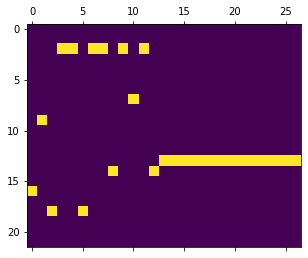

In [0]:
def vectorize(smiles):
        one_hot =  np.zeros((smiles.shape[0], embed , len(charset)),dtype=np.int8)
        for i,smile in enumerate(smiles):
            #encode the start char(!)
            one_hot[i,0,char_to_int["!"]] = 1
            #encode the rest of the chars
            for j,c in enumerate(smile):
                one_hot[i,j+1,char_to_int[c]] = 1
            #Encode end char(E)
            one_hot[i,len(smile)+1:,char_to_int["E"]] = 1
        #Return two, one for input and the other for output
        return one_hot[:,0:-1,:], one_hot[:,1:,:]
X_train, Y_train = vectorize(smiles_train.values)
X_test,Y_test = vectorize(smiles_test.values)
print (smiles_train.iloc[0])
plt.matshow(X_train[0].T)
print (X_train.shape)
print (X_test.shape)

입력 훈련 데이터를 하나의 원-핫 인코딩으로 변환 할 때, 하나의 원-핫 인코딩 된 데이터의 모양은 훈련 데이터는 (5, 44, 14) 및 테스트 데이터는 (3, 44, 14)이됩니다 . 

훈련 데이터의 경우 5 개의 예가 있으며 0-44는 최대 길이이고 14는 고유한 문자입니다.

In [0]:
# 패딩을 올바르게 수행했는지 확인합니다.
"".join([int_to_char[idx] for idx in np.argmax(X_train[0,:,:], axis=1)]) # 'axis=1'로써 1열로 나타냅니다

'!N#CC#CC1COC1EEEEEEEEEEEEEE'

이렇게 벡터화 된 데이터가 준비되면 오토 인코더를 구축 합니다.

먼저 일부 Keras 객체를 가져오고 벡터화 데이터에서 입력 및 출력 치수를 계산합니다.

또한 decoder 및 encoder에 사용할 LSTM 셀의 수가 지정되고 latent dimension이 지정됩니다.

In [0]:
#Import Keras objects
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense # 전체를 결합하는 층입니다.
from keras.layers import Concatenate # 많은 input을 합칩니다.
from keras import regularizers # 최적화 과정 중 각 층별 파라미터 또는 출력값에 대해 패널티(손실 함수)를 적용합니다.
input_shape = X_train.shape[1:]
output_dim = Y_train.shape[-1] 
latent_dim = 64
lstm_dim = 64

Using TensorFlow backend.


이는 TensorFlow 백엔드를 사용한다는 뜻입니다.

# 긴 단기 메모리 셀(LSTM)

LSTM(Long Short-Term Memory models)은 RNN의 히든 state에 cell-state를 추가한 구조입니다. 

이는 RNN에서 입력 정보들의 지점 사이 거리가 멀 경우 역전파시 그레디언트가 점점 줄어 학습능력이 크게 저하 되는 점을 극복합니다.

이들은 입력, 출력 및 잊어 버림 게이트로 설계되어 셀 내부 상태 C로 수행 할 작업을 제어합니다. 

64 LSTM 셀의 단일 레이어는 입력 SMILES 문자열을 읽는 데 사용됩니다. .

In [0]:
unroll = False # 참인 경우 신경망을 펼쳐서 사용합니다.
encoder_inputs = Input(shape=input_shape)
encoder = LSTM(lstm_dim, return_state=True,
                unroll=unroll)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
states = Concatenate(axis=-1)([state_h, state_c])
neck = Dense(latent_dim, activation="relu")
neck_outputs = neck(states)

그런 다음 neck_output 텐서는 decoder LSTM 레이어에 설정되어야하는 상태를 디코딩하기 위해 두 개의 서로 다른 Dense 레이어를 통과합니다. 

인코더에서 디코더로의 내부 상태의 이러한 재결합은 LSTM 계층 자체에 의해 인코딩 된 것과 다른 크기의 latent space를 사용할 수있게한다. 

LSTM 레이어는 입력을 다시 한 번 수신하고 시퀀스의 다음 문자를 예측하는 작업을 수행합니다. 따라서 분자와 문자 "!"의  latent 표현에서 첫 번째 원자를 나타내는 다음 문자가 무엇인지 출력해야합니다 (예 : "C", "N"등). 

따라서 Y 벡터가 X에서 offset 됩니다. 즉, 원하는 만큼 슬라이싱하여 가져오는 것 입니다.

"!"문자가 있는 이 훈련 방법은 한 단계의 결과가 다음 단계의 입력으로 사용되는 접근법과 달리 교사 시행이라고합니다. 

 이를 통해 디코더는 내부 상태를 공급 한 다음 전체 시퀀스를 구성 할 수 있는지 확인하는 것보다 훨씬 효율적으로 디코더를 학습시킵니다. 
 
 각 단계에서 출력되는 LSTM cell은 올바른 특성을 예측하기 위해 각 뉴런 작업과 함께 밀도가 높은 네트워크에 배치됩니다.

따라서,훈련을위한 최종 모델은 입력 레이어 객체와 출력 레이어에서 만들어집니다.

In [0]:
decode_h = Dense(lstm_dim, activation="relu") 
decode_c = Dense(lstm_dim, activation="relu")
state_h_decoded =  decode_h(neck_outputs) # neck_output 텐서는 두개의 서로 다른 dense 층으로 들어갑니다.
state_c_decoded =  decode_c(neck_outputs)
encoder_states = [state_h_decoded, state_c_decoded]
decoder_inputs = Input(shape=input_shape)
decoder_lstm = LSTM(lstm_dim,
                    return_sequences=True,
                    unroll=unroll
                   )
decoder_outputs = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(output_dim, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
print (model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 27, 22)       0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 64), (None,  22272       input_1[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 128)          0           lstm_1[0][1]                     
                                                                 lstm_1[0][2]                     
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           8256        concatenate_1[0][0]        

train이 고원(어느 수준에 도달한 뒤 더이상 진행되지 않는 상태)이 되면 기록값을 기록하고 학습률를 줄이기 위해 일부 Keras call-back을 준비한 후 모델은 최적화 및 손실 기능으로 compile되어 훈련을 시작할 수 있습니다. 

X_train이 모델에 두 번 공급되어 모델의 두 곳에서 입력을 받습니다 

In [0]:
from keras.callbacks import History, ReduceLROnPlateau # keras callback을 시행합니다.
h = History()
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=10, min_lr=0.000001, verbose=1, epsilon=1e-5)

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1335: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


* patience : 성능이 증가하지 않는 epoch 을 몇 번이나 허용할 것인가를 정의한다.
*  verbose=1 : 언제 keras 에서 training 을 멈추었는지를 화면에 출력할 수 있다. 
*  epsilon : 나눴을 때 분모가 0이 되지않기 위해 매우 작은 수를 더한다


이제 RMSprop를 이용하여 학습률이 감소하는 것을 막는 작업을 실시한다

* RMSProp : Adagrad에서 학습률이 급격하게 감소하는 문제를 해결하는 기법


In [0]:
from keras.optimizers import RMSprop, Adam
opt=Adam(lr=0.005) #Default 0.001
model.compile(optimizer=opt, loss='categorical_crossentropy')


이제 훈련 데이터(X_train)와 훈련 데이터의 레이블(Y_train)을 매개변수로 하여 fit 매서드를 호출하여 모델을 훈련합니다.

In [0]:
model.fit([X_train,X_train],Y_train,
                    epochs=100,
                    batch_size=256,
                    shuffle=True,
                    callbacks=[h, rlr],
                    validation_data=[[X_test,X_test],Y_test ])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50029 samples, validate on 16677 samples
Epoch 1/100





50029/50029 [==============================] - 29s 576us/step - loss: 0.8899 - val_loss: 0.6371
Epoch 2/100
50029/50029 [==============================] - 22s 445us/step - loss: 0.5911 - val_loss: 0.5609
Epoch 3/100
50029/50029 [==============================] - 22s 448us/step - loss: 0.5397 - val_loss: 0.5169
Epoch 4/100
50029/50029 [==============================] - 22s 447us/step - loss: 0.4870 - val_loss: 0.4658
Epoch 5/100
50029/50029 [==============================] - 22s 448us/step - loss: 0.4345 - val_loss: 0.4315
Epoch 6/100
50029/50029 [==============================] - 22s 447us/step - loss: 0.3843 - val_loss: 0.4673
Epoch 7/100
50029/50029 [==============================] - 22s 446us/step - loss: 0.3395 - val_loss: 0.3062
Epoch 8/100
50029/50029 [==============================] - 22s 447us/step - loss: 0.2887 - v

훈련과정은 기록된 데이터들과 플롯되어 아래의 그래프를 나타냅니다.

손실 및 유효성 검사 손실에는 약간의 급증이 있지만 결국 손실 및 유효성 검사 손실 은 점점 떨어집니다. 

로그 스케일은 손실과 유효성 검증 손실 사이의 증가하는 차이가 실제보다 크게 나타납니다.

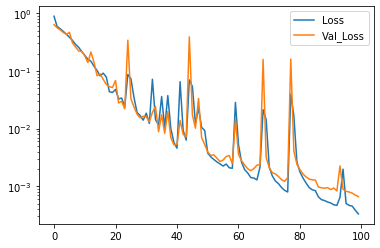

In [0]:
plt.plot(h.history["loss"], label="Loss")
plt.plot(h.history["val_loss"], label="Val_Loss")
plt.yscale("log")
plt.legend()

훈련 된 데이터를 새로운 모델로 재구성 하기 전에 모델에 대한 빠른 테스트를 통해 테스트 세트에서도 재구성 정확도가 우수함을 알 수 있습니다.

 아래 코드는 아무것도 출력하지 않으므로 테스트 세트에서 100 개의 테스트 된 SMILES을 그대로 재사용합니다.

또한 테스트 세트에서 재구성 정확도를 비교합니다

In [0]:
for i in range(100):
    v = model.predict([X_test[i:i+1], X_test[i:i+1]]) #Can't be done as output not necessarely 1
    idxs = np.argmax(v, axis=2) #인덱스에 최댓값을 저장합니다.
    pred=  "".join([int_to_char[h] for h in idxs[0]])[:-1]
    idxs2 = np.argmax(X_test[i:i+1], axis=2)
    true =  "".join([int_to_char[k] for k in idxs2[0]])[1:]
    if true != pred:
        print (true, pred)

CC(C1CO1)N(C)CEEEEEEEEEEEE CC(C1CO1)N(C)OEEEEEEEEEEEE


예측하여 재구성한 테스트 데이터와 실제 테스트 데이터가 일치하여 정확도가 우수합니다.

두 데이터 모두 끝이 E로 끝남을 확인할 수도 있습니다.

이제 훈련 된 자동 인코더의 일부를 사용하여 다양한 인코더 및 디코더 모델을 작성합니다.

 입력 레이어에서 다른 모델 내부의 출력 레이어로 새 모델을 작성하는 것은 매우 간단합니다. 
 
 모델을 만들 때 정의 된 입력 레이어는 재사용되고 neck_output은 출력으로 재사용 됩니다. 
 
 이 모델은 벡터화 된 SMILES를 취하여 latent space로 인코딩합니다.

In [0]:
smiles_to_latent_model = Model(encoder_inputs, neck_outputs) #latent_model로 인코딩합니다.


In [0]:
smiles_to_latent_model.save("Blog_simple_smi2lat.h5") 


다음에 필요한 모델은 latent space를 디코더 LSTM 셀에서 설정해야하는 상태로 디코딩 할 수 있는 모델입니다.

latent space와 일치하는 새로운 입력이 정의 되었지만 이전의 레이어를 재사용하여 h (은닉)및 c(셀) 상태를 얻을 수 있습니다. 그렇게하면 가중치가 훈련된 모델에서 상속됩니다.

In [0]:
latent_input = Input(shape=(latent_dim,))
#앞선 모델의 층을 재사용합니다.
state_h_decoded_2 =  decode_h(latent_input)
state_c_decoded_2 =  decode_c(latent_input)
latent_to_states_model = Model(latent_input, [state_h_decoded_2, state_c_decoded_2])
latent_to_states_model.save("Blog_simple_lat2state.h5")


디코더 모델에는 약간 더 많은 작업이 필요합니다. 

배치 모드에서 이미 학습되었지만 한 번에 한 문자를 예측하는 곳에 사용되기 떄문입니다.

따라서 새로운 batch_shape와 LSTM 레이어가 stateful(메모리를 가지는 형태)로 설정된 경우를 제외하고 레이어는 이전과 같이 정확하게 정의됩니다.

In [0]:
#배치&LSTM층이 stateful로 설정되도록 바꾸고 input shape도 바꾼다
inf_decoder_inputs = Input(batch_shape=(1, 1, input_shape[1]))
inf_decoder_lstm = LSTM(lstm_dim,
                    return_sequences=True,
                    unroll=unroll,
                    stateful=True
                   )
inf_decoder_outputs = inf_decoder_lstm(inf_decoder_inputs)
inf_decoder_dense = Dense(output_dim, activation='softmax')
inf_decoder_outputs = inf_decoder_dense(inf_decoder_outputs)
sample_model = Model(inf_decoder_inputs, inf_decoder_outputs)

디코더 모델을 정의한 후 학습 된 자동 인코더 모델에서 해당 가중치가 전송됩니다

In [0]:
#가중치 전송
for i in range(1,3):
    sample_model.layers[i].set_weights(model.layers[i+6].get_weights())
sample_model.save("Blog_simple_samplemodel.h5")

In [0]:
sample_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (1, 1, 22)                0         
_________________________________________________________________
lstm_3 (LSTM)                (1, 1, 64)                22272     
_________________________________________________________________
dense_5 (Dense)              (1, 1, 22)                1430      
Total params: 23,702
Trainable params: 23,702
Non-trainable params: 0
_________________________________________________________________


* Output shape = (batch_size, sequence_length, hidden_size) 이다

#Using the latent space as a fingerprint


잠재 모델에 대한 스마일은 잠재 공간과 같은 SMILES를 지문으로 인코딩하는 데 사용할 수 있습니다.

In [0]:
x_latent = smiles_to_latent_model.predict(X_test)  # x_test의 예측값

fingerprint의 유용한 기능은 유사한 분자가 유사한 fingerprint를 생성하는 것입니다. 유사한 분자가 latent space에서 유사한 벡터를 생성하는지 확인하기 위해 유사한 분자에 대한 간단한 검색을 수행 할 수 있습니다.

 여기서 latent vector 간의 절대 차이는 metric of similarity로 사용됩니다. 
 
 이 테스트는 유사한 분자가 유사하지 않은 잠재 벡터를 얻을 수 있다는 것을 배제하지는 않지만 바로 근처에 대한 빠른 테스트입니다.

[    5 14589  1243 15472 13788   744  8674  2449 12643 15039]
45051    COCc1cocn1
44719    COCc1ccno1
45007    COCc1ccoc1
45061    COCc1conn1
58354    COc1occc1C
45025    CCOc1cnoc1
55832    OCc1occc1O
45063    CCOc1conn1
Name: smiles, dtype: object


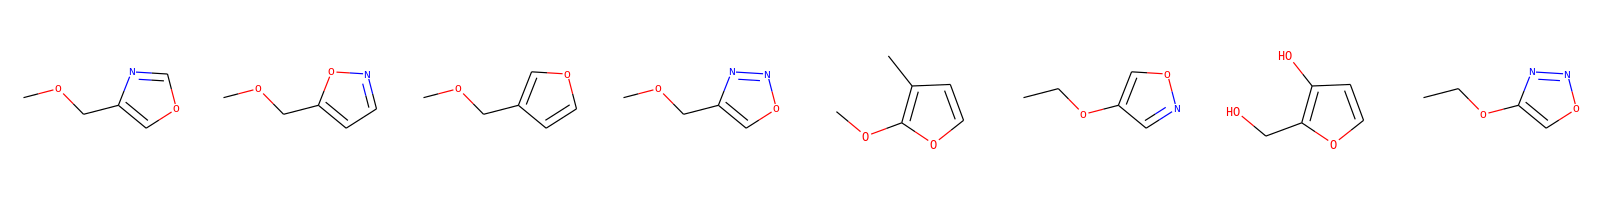

In [0]:
molno = 5
latent_mol = smiles_to_latent_model.predict(X_test[molno:molno+1])
sorti = np.argsort(np.sum(np.abs(x_latent - latent_mol), axis=1)) # 자료를 정렬했을떄 순서  argsort 명령을 사용.
print (sorti[0:10])
print (smiles_test.iloc[sorti[0:8]]) # iloc 행번호 기준으로 행 데이터 읽기
Draw.MolsToImage(smiles_test.iloc[sorti[0:8]].apply(Chem.MolFromSmiles))


첫 번째는 쿼리 분자입니다. 그것들은 비슷해 보이지만 분자 유사성에 대한 우리의 이해를 따르기보다는 SMILES 줄이 매우 유사하기 때문일 수 있습니다. 잠재 공간에서 가장 다른 분자가 무엇인지 살펴 보겠습니다.

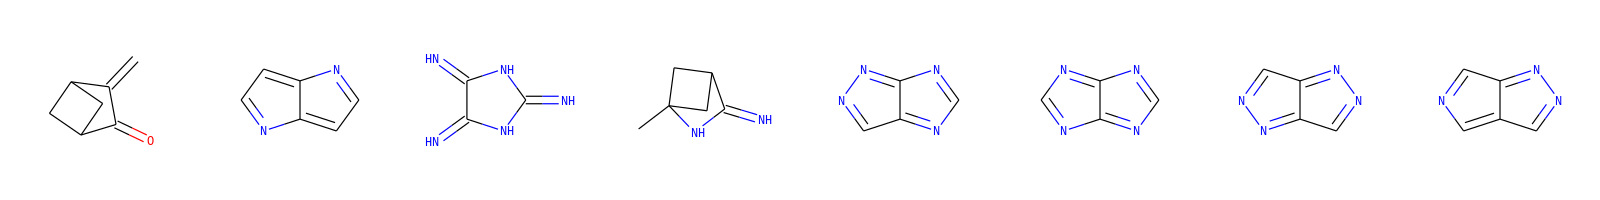

In [0]:
Draw.MolsToImage(smiles_test.iloc[sorti[-8:]].apply(Chem.MolFromSmiles))  # iloc 행번호 기준으로 행 데이터 읽기

# Chemical properties in the latent space


화학적 특성의 대리자로서, 계산 된 LogP 및 MR이 잠재 공간의 PCA 감소에 어떻게 매핑되는지 확인하십시오

LogP(친지질도) : n-octanol(비극성)/water(극성) 화학물의 분배계수 & 화합물이 완전한 중성상태의 pH에서의 분배계수
 
 
 LogP 데이터는 미국 국립 센터 - 미국 국립 보건원의 데이터 세트 중 하나로써 데이터 세트에는 총 10,850개의 샘플이 포함되어 있습니다

각각의 샘플에는 SMILE 문자열 쌍과 물-에탄올 분배계수가 포함되어 있습니다.

PCA : 여러 데이터들이 모여 하나의 분포를 이룰 때 분포의 주성분(어느 방향으로 데이터의 분산이 가장 큰 방향벡터) 분석 방법

2차원 데이터 집합에 PCA를 수행하면 2개의 서로 수직인 주성분 벡터를 반환하고,
<BR> 3차원 점들에 대해 PCA를 수행하면 3개의 서로 수직인 주성분 벡터를 반환합니다.

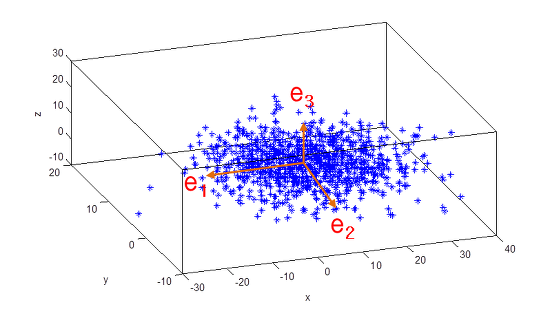

In [0]:
logp = smiles_test.apply(Chem.MolFromSmiles).apply(Descriptors.MolLogP)
#mol의 logP(친수성, 소수성 정도)값을  나타낸다

[0.19561559 0.18632503] 0.3819406


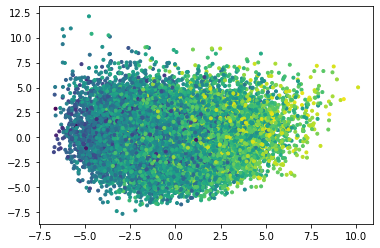

In [0]:
from sklearn.decomposition import PCA  # PCA: 데이터 차원을 축소해 다루기 쉽게해준다
pca = PCA(n_components = 2) # 2차원 데이터로 축소
red = pca.fit_transform(x_latent)
plt.figure()
plt.scatter(red[:,0], red[:,1],marker='.', c= logp)
print(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))
# Explained Variance Ratio은 각각의 주성분 벡터가 이루는 축에 투영(projection)한 결과의 분산의 비율
# 2차원 데이터로 표현하면서 데이터의 0.6 정도가 소실.


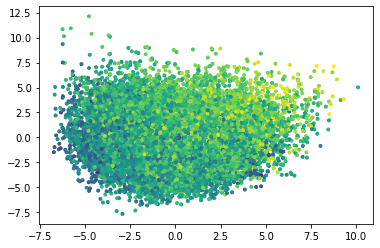

In [0]:
molwt = smiles_test.apply(Chem.MolFromSmiles).apply(Descriptors.MolMR)
plt.figure()
plt.scatter(red[:,0], red[:,1],marker='.', c= molwt)


예측 된 분자 특성의 분포가있는 것 같습니다.

# Modeling properties from the latent space


지문이 QSAR 모델의 기초로 잘 작동하는지 확인하는 것도 흥미로울 수 있습니다. QSAR 모델링의 목표 값에 대한 프록시로서 예측 된 LogP 모델이 작성됩니다. 모델링 된 속성을 사용하여 모델을 작성하는 것은 데모 목적으로 만 수행됩니다.

In [0]:
#Model LogP?
x_train_latent = smiles_to_latent_model.predict(X_train)
logp_train = smiles_train.apply(Chem.MolFromSmiles).apply(Descriptors.MolLogP)


In [0]:
from keras.models import Sequential
logp_model = Sequential()
logp_model.add(Dense(128, input_shape=(latent_dim,), activation="relu"))
logp_model.add(Dense(128, activation="relu"))
logp_model.add(Dense(1))
logp_model.compile(optimizer="adam", loss="mse")

In [0]:
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=10, min_lr=0.000001, verbose=1, epsilon=1e-5)
logp_model.fit(x_train_latent, logp_train, batch_size=128, epochs=200, callbacks = [rlr])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1335: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Epoch 1/200
50029/50029 [==============================] - 2s 42us/step - loss: 0.4408
Epoch 2/200
 4992/50029 [=>............................] - ETA: 1s - loss: 0.3642

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1379: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_loss` which is not available. Available metrics are: loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50029/50029 [==============================] - 2s 32us/step - loss: 0.3423
Epoch 3/200
50029/50029 [==============================] - 2s 30us/step - loss: 0.3163
Epoch 4/200
50029/50029 [==============================] - 1s 30us/step - loss: 0.2888
Epoch 5/200
50029/50029 [==============================] - 2s 31us/step - loss: 0.2674
Epoch 6/200
50029/50029 [==============================] - 2s 30us/step - loss: 0.2519
Epoch 7/200
50029/50029 [==============================] - 2s 31us/step - loss: 0.2393
Epoch 8/200
50029/50029 [==============================] - 2s 31us/step - loss: 0.2286
Epoch 9/200
50029/50029 [==============================] - 1s 29us/step - loss: 0.2227
Epoch 10/200
50029/50029 [==============================] - 2s 31us/step - loss: 0.2138
Epoch 11/200
50029/50029 [==============================] - 1s 30us/step - loss: 0.2068
Epoch 12/200
50029/50029 [==============================] - 2s 30us/step - loss: 0.1981
Epoch 13/200
50029/50029 [==========================

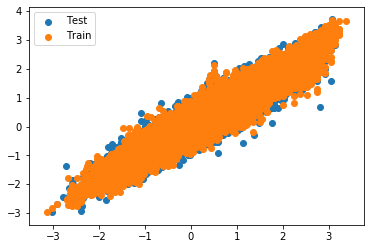

In [0]:
logp_pred_train = logp_model.predict(x_train_latent)
logp_pred_test = logp_model.predict(x_latent)
plt.scatter(logp, logp_pred_test, label="Test")
plt.scatter(logp_train, logp_pred_train, label="Train")
plt.legend()

모델링 된 property를  모델링 할 때 훨씬 더 잘 맞을 것으로 예상됩니다.

# From latent space to SMILES


latent space를 샘플링하려면 두 단계가 필요합니다. 

먼저 latent_to_states_model을 사용하여 state h & state c를 계산 한 다음 디코더 LSTM 네트워크의 초기 상태를 설정합니다.

LSTM 네트워크에는 입력 문자 벡터가 입력되고 끝 문자 "E"가 나타날 때까지 다음 문자를 반복적으로 샘플링합니다.

In [0]:
def latent_to_smiles(latent):
    #decode states and set Reset the LSTM cells with them
    states = latent_to_states_model.predict(latent)
    sample_model.layers[1].reset_states(states=[states[0],states[1]])
    #Prepare the input char
    startidx = char_to_int["!"]
    samplevec = np.zeros((1,1,22))
    samplevec[0,0,startidx] = 1
    smiles = ""
    #Loop and predict next char
    for i in range(28):
        o = sample_model.predict(samplevec)
        sampleidx = np.argmax(o)
        samplechar = int_to_char[sampleidx]
        if samplechar != "E":
            smiles = smiles + int_to_char[sampleidx]
            samplevec = np.zeros((1,1,22))
            samplevec[0,0,sampleidx] = 1
        else:
            break
    return smiles

In [0]:
smiles = latent_to_smiles(x_latent[0:1])
print (smiles)
print (smiles_test.iloc[0])

NCCC1OC=NO1
NCCC1OC=NO1


테스트 세트를 샘플링 할 때 SMILES의 비율이 얼마나 큰지 아는 것이 적절할 수 있습니까?

In [0]:
wrong = 0
for i in range(1000):
    smiles = latent_to_smiles(x_latent[i:i+1])
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        pass
    else:
        print (smiles)
        wrong = wrong + 1
print ("%0.1F percent wrongly formatted smiles"%(wrong/float(1000)*100))


CC(1)O=CC#CC1
Cc1ccc(NN)=N
0.2 percent wrongly formatted smiles


즉  smile 형태에서 0.1% 오차가 있습니다.

이것은 실제로 아주 좋습니다. 또 다른 흥미로운 점은 잠복 공간에서 분자가 "보간"될 수 있는지 확인하는 것입니다.

NCC1C=OCCN1
NCC1C=OCCN1
NCC1C=OCCN1
NCC1(NOCCN1
NCC1(NOCCN1
C=CC1CNCN=O1
C=CC1CNNC=O1


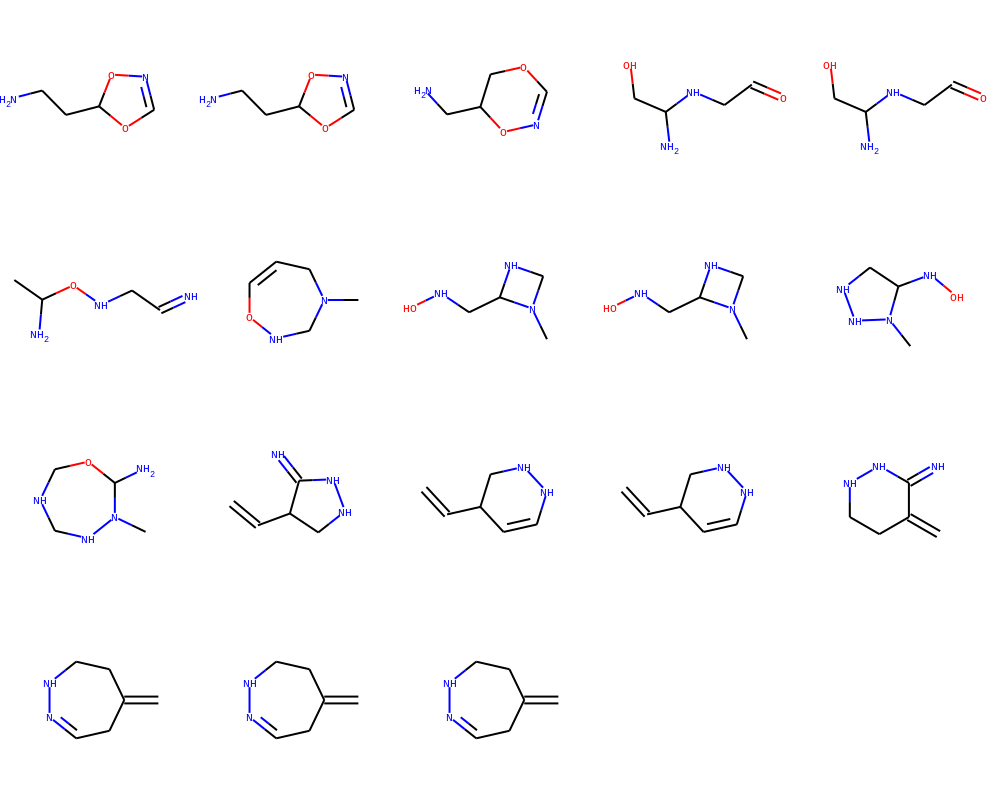

In [0]:
#Interpolation test in latent_space
i = 0
j= 2
latent1 = x_latent[j:j+1]
latent0 = x_latent[i:i+1]
mols1 = []
ratios = np.linspace(0,1,25)
for r in ratios:
    #print r
    rlatent = (1.0-r)*latent0 + r*latent1
    smiles  = latent_to_smiles(rlatent)
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mols1.append(mol)
    else:
        print (smiles)
Draw.MolsToGridImage(mols1, molsPerRow=5)

25 개 분자 중 2 개를 파싱 할 수 없기 때문에 잘못된 샘플링이 더 높은 것 같습니다. 보간은 또한 잠복 공간의 약간 다른 영역에 대해 동일한 분자가 어떻게 생성되는지를 보여줍니다. 이것은 분자가 불연속적이고 잠복 공간이 연속적이라는 것을 반영하며, 우리가 두 분자 사이의 경계에있을 때 실패 할 가능성이 높습니다.
검사해야 할 또 다른 흥미로운 특성은 기존 분자 벡터에 약간의 무작위성을 추가함으로써 리드 분자와 다소 유사한 신규 분자가있을 수 있는지입니다.

NCCC1=OCNO1
NCCCOC=O)=N
NCCC1=OCCN1
NCCCO(O)NN
COCCN1C=ON1
NCCCO1CON1
NCCC1=OCCN1
CNC1CCO=NN1


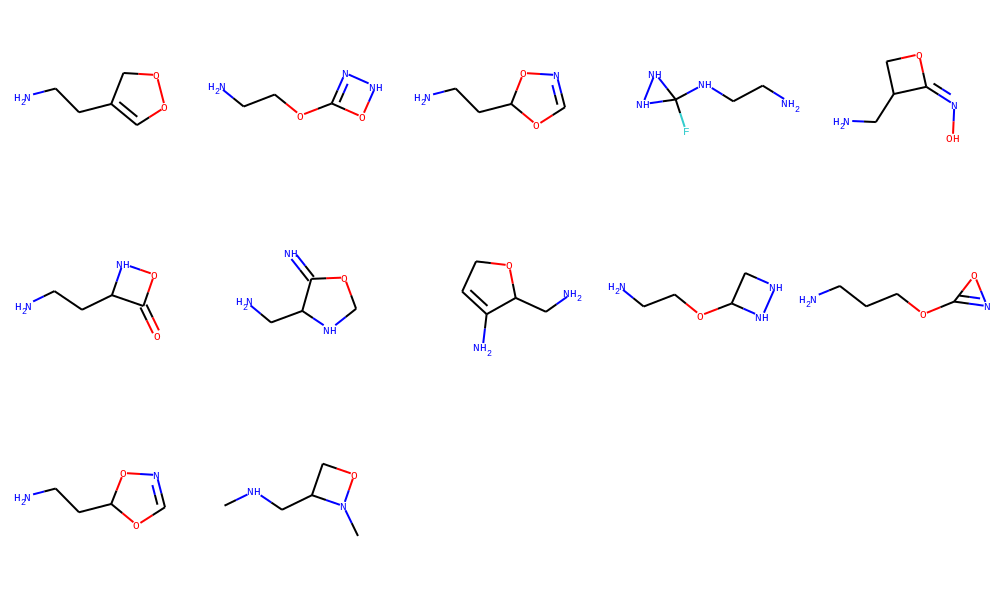

In [0]:
#Sample around the latent wector
latent = x_latent[0:1]
scale = 0.40
mols = []
for i in range(20):
    latent_r = latent + scale*(np.random.randn(latent.shape[1])) #TODO, try with
    smiles = latent_to_smiles(latent_r)
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mols.append(mol)
    else:
        print (smiles)
        
Draw.MolsToGridImage(mols, molsPerRow=5)

여기서 우리는 실제로 많은 잘못된 SMILES가 생성되는 것을 볼 수 있지만 그럼에도 불구하고 잠재 벡터를 인코딩하는 데 사용 된 것과 다소 유사 할 수있는 일부 분자를 볼 수 있습니다.

 (위 보간에서 첫 번째 분자와 비교). 스케일링을 조정하면 창의성을 튜닝 할 수 있습니다.


NCCCO1C=NO1
NCC1COC=N1O
NCCCO1C=NO1
NCCC1OC=ON1


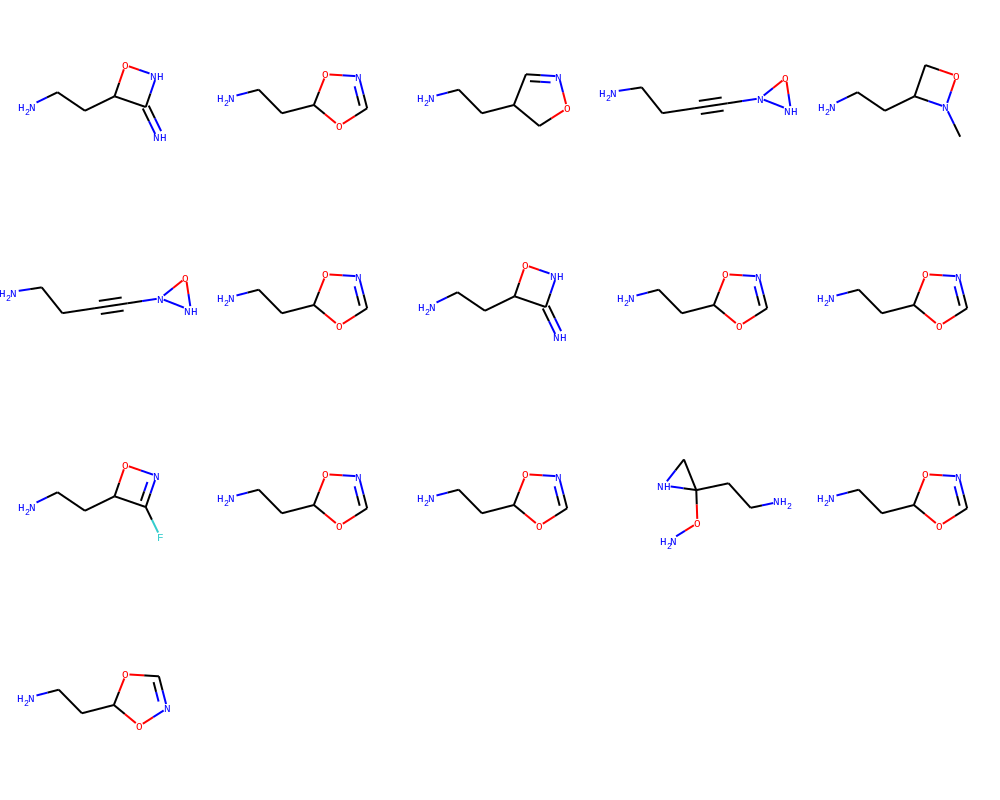

In [0]:
#Sample around the latent wector
latent = x_latent[0:1]
scale = 0.20
mols = []
for i in range(20):
    latent_r = latent + scale*(np.random.randn(latent.shape[1])) #TODO, try with
    smiles = latent_to_smiles(latent_r)
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mols.append(mol)
    else:
        print (smiles)
        
Draw.MolsToGridImage(mols, molsPerRow=5)

scale을 0.2로 했더니 위와 비슷함을 알 수 있습니다.

#정리

이 블로그 포스트에서는 SMILES 분자 분자의 LSTM 기반 자동 인코더를 만드는 방법과 교사 시행으로 효율적으로 훈련하는 방법을 보여주었습니다. 잠재 공간은 SMILES의 구조를 반영 할 수 있지만 그럼에도 불구하고 다양한 화학 포맷 관련 작업에 유용하게 보입니다. 분자들 사이의 도메인 경계를 정하거나 랜덤 노이즈를 추가 할 때 SMILES 재구성 정확도가 떨어지는 것처럼 보입니다. 따라서, 잠재 공간은 분자의 불연속 특성을 반영하여 완전히 연속적이지 않을 수있다. 처음에는 지능을 정의하는 방법을 잘 모르기 때문에이 블로그 게시물에서 AI를 언급하지 않았지만 SMILES 문자열의 화학적 규칙을 수행하는 가중치와 계산으로 어떻게 찾을 수 있는지는 매력적입니다. LSTM 셀의 신경망은 나중에 새로운 SMILES 스트링을 만드는 데 사용됩니다.